In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib.style
import tqdm.auto as tqdm
from scipy.stats import gaussian_kde
plt.style.use('seaborn')


def load_flux(fluxname):

    with open(fluxname, 'r') as file:
        data = file.readlines()
        #print(data)
        size = len(data)
        #print(size)
        flux = np.zeros(size)
        wavelengths = np.zeros(size)
        for i in range(size):
            flux[i]=(float(data[i].strip().split(" ,")[1]))
            wavelengths[i]=(float(data[i].strip().split(",")[0]))

    return flux,wavelengths

C:\Users\soham\AppData\Local\Temp\ipykernel_2656\3523299983.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
flux, wavelengths = load_flux("Data\m3_solarflux.txt")

In [95]:
wavelengths

array([ 460.98999 ,  500.920013,  540.840027,  580.765015,  620.689941,
        660.609985,  700.537537,  730.47998 ,  750.440002,  770.400024,
        790.36499 ,  810.330017,  830.290039,  850.25    ,  870.209961,
        890.174988,  910.140015,  930.099976,  950.059998,  970.02002 ,
        989.97998 , 1009.950012, 1029.910034, 1049.869995, 1069.829956,
       1089.790039, 1109.76001 , 1129.719971, 1149.679932, 1169.640015,
       1189.599976, 1209.570068, 1229.530029, 1249.48999 , 1269.449951,
       1289.410034, 1309.375   , 1329.339966, 1349.300049, 1369.26001 ,
       1389.219971, 1409.185059, 1429.150024, 1449.109985, 1469.070068,
       1489.030029, 1508.994995, 1528.959961, 1548.920044, 1578.859985,
       1618.787598, 1658.710083, 1698.630005, 1738.560059, 1778.47998 ,
       1818.405029, 1858.330078, 1898.25    , 1938.179932, 1978.099976,
       2018.022461, 2057.949951, 2097.869873, 2137.797363, 2177.719971,
       2217.642578, 2257.570068, 2297.48999 , 2337.414795, 2377.

In [4]:
import seaborn as sns

# defining phase disk and phase functions and fit:

In [92]:
data = np.loadtxt('70thband.txt')
wav = np.round(wavelengths[69],2)

# fitting using mean value based data reduction

In [93]:
percentage_spread=20

filtered_x_values = []
filtered_y_values = []
filtered_i_values = []
filtered_e_values = []

# Loop over unique x-values
for x_val in np.unique(data[:,0]):
    # Filter y-values within percentage spread from average y-value
    y_values_for_x = data[data[:, 0] == x_val, 3]
    avg_y_value = np.mean(y_values_for_x)
    spread_threshold = avg_y_value * (percentage_spread / 100)
    filtered_y_values_for_x = y_values_for_x[(y_values_for_x >= avg_y_value - spread_threshold) & (y_values_for_x <= avg_y_value + spread_threshold)]
    
    # Get corresponding i and e values for filtered y-values
    i_values_for_x = data[data[:, 0] == x_val, 1]
    e_values_for_x = data[data[:, 0] == x_val, 2]
    filtered_i_values_for_x = i_values_for_x[:len(filtered_y_values_for_x)]
    filtered_e_values_for_x = e_values_for_x[:len(filtered_y_values_for_x)]
    
    # Add filtered x, y, i, and e values to lists
    filtered_x_values.extend([x_val] * len(filtered_y_values_for_x))
    filtered_y_values.extend(filtered_y_values_for_x)
    filtered_i_values.extend(filtered_i_values_for_x)
    filtered_e_values.extend(filtered_e_values_for_x)

# Convert lists to NumPy arrays
filtered_x_values = np.array(filtered_x_values)
filtered_y_values = np.array(filtered_y_values)
filtered_i_values = np.array(filtered_i_values)
filtered_e_values = np.array(filtered_e_values)

C:\Users\soham\AppData\Local\Temp\ipykernel_2656\802029258.py:19: RuntimeWarning: divide by zero encountered in divide
  l = np.arctan((np.cos(i)/np.cos(e) - np.cos(phase))/np.sin(phase))
C:\Users\soham\AppData\Local\Temp\ipykernel_2656\802029258.py:19: RuntimeWarning: invalid value encountered in divide
  l = np.arctan((np.cos(i)/np.cos(e) - np.cos(phase))/np.sin(phase))


A = 0.12517
beta = -0.35809
gamma = -1.51124
delta = 1.27714


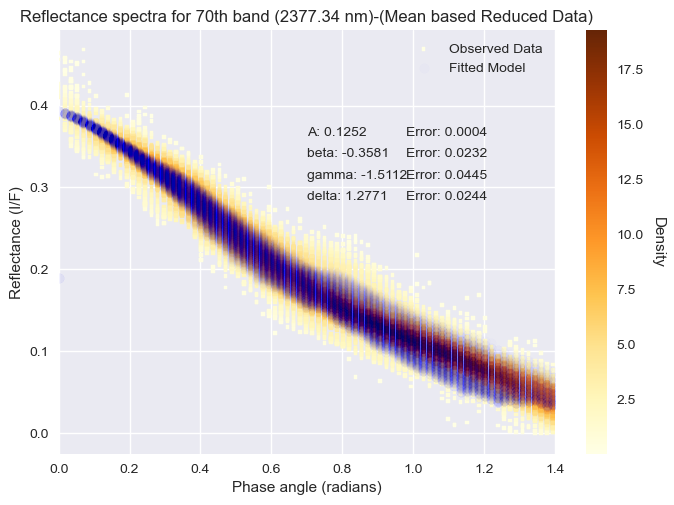

In [94]:

from scipy.optimize import curve_fit

#plt.scatter(data[:,0], data[:,3], marker='s', s=5, color='orange')
#plt.xlabel('phase angle(degree)')
#plt.ylabel('Reflectance (I/F)')
#plt.title('Reflectance spectra for 5th band (620.689941 nm)')




i = (data[:,1]*np.pi)/180
phase= (data[:,0]*np.pi)/180
e = (data[:,2]*np.pi)/180
refl_value = data[:,3]

# disk function
def Akimov_disk_function(i, e, phase):
    
    l = np.arctan((np.cos(i)/np.cos(e) - np.cos(phase))/np.sin(phase))
    cosb = np.cos(e)/np.cos(i)
    a = phase/np.pi - phase
    
    func1 = np.cos((np.pi/(np.pi-phase)) * (l - phase/2))
    
    func2 = (cosb**a)/np.cos(l)
    
    func3 = np.cos(phase/2)
    
    return func3*func1*func2

def Akimov_phase_function(A, beta, gamma, delta, phase):
    value = A * np.pi * np.exp(beta*phase + gamma*phase**2 + delta*phase**3)
    return value


i_ = (filtered_i_values*np.pi)/180
phase_= (filtered_x_values*np.pi)/180
e_ = (filtered_e_values*np.pi)/180
refl_value_ = filtered_y_values

def Akimov_function(phase, A, beta, gamma, delta):
    i = i_
    e = e_
    refl = Akimov_disk_function(i, e, phase)*Akimov_phase_function(A, beta, gamma, delta, phase)
    
    mean_value = np.nanmean(refl)
    result = np.where(np.isnan(refl), mean_value, refl)
    return result


density = gaussian_kde([phase, refl_value])([phase, refl_value])
density_values = density / density.max()
weights = 1/density


par = ['A', 'beta', 'gamma', 'alpha']
initial_guess = [0.01, -3, 2, -1.5]  

# Bounds for parameters
bounds = ([0, -4, -1, -2], [1, 1, 3, 2])  
fitted_params, covariance = curve_fit(Akimov_function, phase_, refl_value_, initial_guess, method='lm')

param_names = ['A', 'beta', 'gamma', 'delta'] 
var = np.diag(covariance)
std_dev = np.sqrt(var)

print(f'A = {fitted_params[0]:.5f}')
print(f'beta = {fitted_params[1]:.5f}')
print(f'gamma = {fitted_params[2]:.5f}')
print(f'delta = {fitted_params[3]:.5f}')
# Plot the true data and the fitted model
plt.scatter(phase, refl_value, c=density, cmap='YlOrBr', marker='s', s=7, label='Observed Data',alpha=1)
colorbar = plt.colorbar(label='Density')  # Add colorbar to show density scale
colorbar.set_label('Density', rotation=270, labelpad=15)
plt.scatter(phase_, Akimov_function(phase_, *fitted_params), color='blue', label='Fitted Model',alpha=0.01)
plt.xlabel('Phase angle (radians)')
plt.ylabel('Reflectance (I/F)')
plt.title(f'Reflectance spectra for 70th band ({wav} nm)-(Mean based Reduced Data)')
plt.xlim(0,1.4)
plt.legend()
plt.grid(True)
for i, param_value in enumerate(fitted_params):
    plt.text(0.5, 0.75 - i * 0.05, f'{param_names[i]}: {param_value:.4f} ', transform=plt.gca().transAxes)
    plt.text(0.7, 0.75 - i * 0.05, f'Error: {std_dev[i]:.4f} ', transform=plt.gca().transAxes)
plt.show()


# data reduction using i+e=a

C:\Users\soham\AppData\Local\Temp\ipykernel_2656\2152946182.py:25: RuntimeWarning: invalid value encountered in power
  func2 = (cosb**a)/np.cos(l)


A = 0.09437
beta = -1.23971
gamma = 0.29766
delta = 0.35515


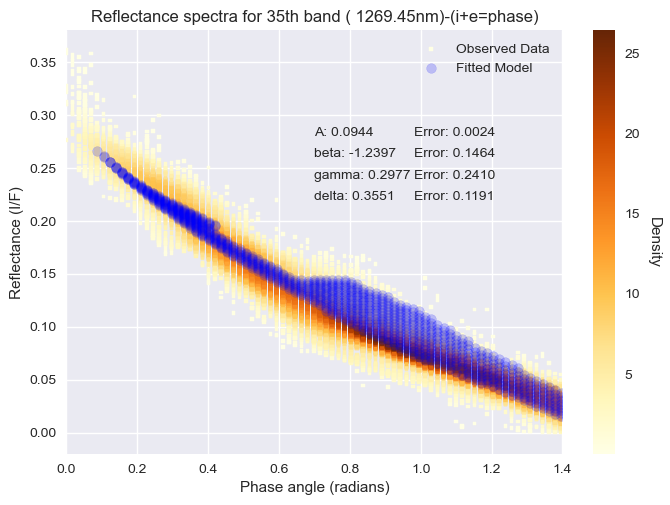

In [75]:
filtered_data = []
for j in range(len(data)):
    i = data[j,1]
    e = data[j,2]
    a = data[j,0]  # a is the phase data
    if i + e == a:
        filtered_data.append(data[j])

# Convert filtered data to NumPy array
filtered_data = np.array(filtered_data)




density = gaussian_kde([phase, refl_value])([phase, refl_value])
density_values = density / density.max()
weights = 1/density

a = (filtered_data[:,0]*np.pi)/180
refl = filtered_data[:,3]
def Akimov_function(phase, A, beta, gamma, delta):
    i = (filtered_data[:,1]*np.pi)/180
    e = (filtered_data[:,2]*np.pi)/180
    refl = Akimov_disk_function(i, e, a)*Akimov_phase_function(A, beta, gamma, delta, a)
    
    mean_value = np.nanmean(refl)
    result = np.where(np.isnan(refl), mean_value, refl)
    return result

fitted_params, covariance = curve_fit(Akimov_function,a, refl, initial_guess, method='lm')

param_names = ['A', 'beta', 'gamma', 'delta'] 
var = np.diag(covariance)
std_dev = np.sqrt(var)

print(f'A = {fitted_params[0]:.5f}')
print(f'beta = {fitted_params[1]:.5f}')
print(f'gamma = {fitted_params[2]:.5f}')
print(f'delta = {fitted_params[3]:.5f}')
# Plot the true data and the fitted model
plt.scatter(phase, refl_value, c=density, cmap='YlOrBr', marker='s', s=7, label='Observed Data',alpha=1)
colorbar = plt.colorbar(label='Density')  # Add colorbar to show density scale
colorbar.set_label('Density', rotation=270, labelpad=15)
plt.scatter(a, Akimov_function(a, *fitted_params), color='blue', label='Fitted Model',alpha=0.2)
plt.xlabel('Phase angle (radians)')
plt.ylabel('Reflectance (I/F)')
plt.title(f'Reflectance spectra for 35th band ( {wav}nm)-(i+e=phase)')
plt.xlim(0,1.4)
plt.legend()
plt.grid(True)
for i, param_value in enumerate(fitted_params):
    plt.text(0.5, 0.75 - i * 0.05, f'{param_names[i]}: {param_value:.4f} ', transform=plt.gca().transAxes)
    plt.text(0.7, 0.75 - i * 0.05, f'Error: {std_dev[i]:.4f} ', transform=plt.gca().transAxes)
plt.show()


C:\Users\soham\AppData\Local\Temp\ipykernel_2656\2152946182.py:19: RuntimeWarning: divide by zero encountered in divide
  l = np.arctan((np.cos(i)/np.cos(e) - np.cos(phase))/np.sin(phase))
C:\Users\soham\AppData\Local\Temp\ipykernel_2656\2152946182.py:19: RuntimeWarning: invalid value encountered in divide
  l = np.arctan((np.cos(i)/np.cos(e) - np.cos(phase))/np.sin(phase))
C:\Users\soham\AppData\Local\Temp\ipykernel_2656\2152946182.py:25: RuntimeWarning: invalid value encountered in power
  func2 = (cosb**a)/np.cos(l)


A = 0.08999
beta = -0.50718
gamma = -1.62437
delta = 1.50163


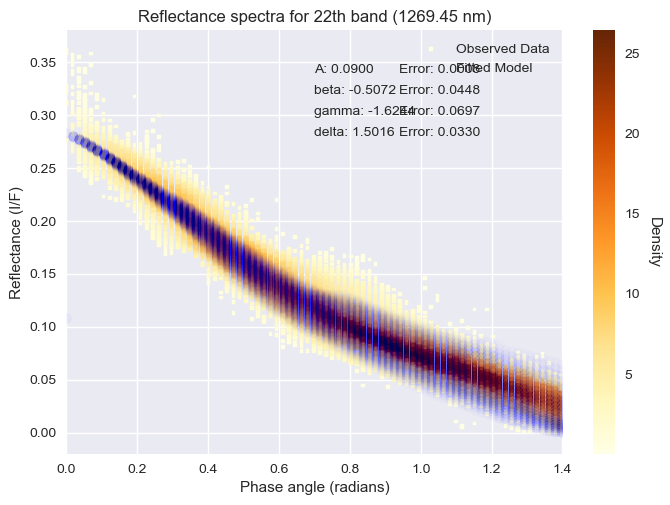

In [76]:
density = gaussian_kde([phase, refl_value])([phase, refl_value])
density_values = density / density.max()
weights = 1/density

def Akimov_function(phase, A, beta, gamma, delta):
    i = (data[:,1]*np.pi)/180
    e = (data[:,2]*np.pi)/180
    refl = Akimov_disk_function(i, e, phase)*Akimov_phase_function(A, beta, gamma, delta, phase)
    
    mean_value = np.nanmean(refl)
    result = np.where(np.isnan(refl), mean_value, refl)
    return result

fitted_params, covariance = curve_fit(Akimov_function, phase, refl_value, initial_guess, method='lm', sigma=weights)

param_names = ['A', 'beta', 'gamma', 'delta'] 
var = np.diag(covariance)
std_dev = np.sqrt(var)

print(f'A = {fitted_params[0]:.5f}')
print(f'beta = {fitted_params[1]:.5f}')
print(f'gamma = {fitted_params[2]:.5f}')
print(f'delta = {fitted_params[3]:.5f}')
# Plot the true data and the fitted model
plt.scatter(phase, refl_value, c=density, cmap='YlOrBr', marker='s', s=7, label='Observed Data',alpha=1)
colorbar = plt.colorbar(label='Density')  # Add colorbar to show density scale
colorbar.set_label('Density', rotation=270, labelpad=15)
plt.scatter(phase, Akimov_function(phase, *fitted_params), color='blue', label='Fitted Model',alpha=0.0095)
plt.xlabel('Phase angle (radians)')
plt.ylabel('Reflectance (I/F)')
plt.title(f'Reflectance spectra for 22th band ({wav} nm)')
plt.xlim(0,1.4)
plt.legend()
plt.grid(True)
for i, param_value in enumerate(fitted_params):
    plt.text(0.5, 0.9 - i * 0.05, f'{param_names[i]}: {param_value:.4f} ', transform=plt.gca().transAxes)
    plt.text(0.67, 0.9 - i * 0.05, f'Error: {std_dev[i]:.4f} ', transform=plt.gca().transAxes)
plt.show()
